# Generating the UNSW-NB15 sub-datasets

In [1]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting

import warnings
warnings.filterwarnings("ignore")

To generate the datasets, download the different UNSW-NB15 CSV files and put it into the datasets directory.

In [ ]:
# Reading datasets
dfs = []
for i in range(1,5):
    path = '../datasets/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
all_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

# This csv file contains names of all the features
df_col = pd.read_csv('../datasets/NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renaming our dataframe with proper column names
all_data.columns = df_col['Name']
del df_col


In [ ]:
# We don't have "normal" values for "attack_cat", so we must fill Null values with "normal"
all_data['attack_cat'] = all_data.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())


In [ ]:
all_data['attack_cat'] = all_data['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [ ]:
all_data['ct_flw_http_mthd'] = all_data.ct_flw_http_mthd.fillna(value=0)

In [ ]:
all_data['is_ftp_login'] = (all_data.is_ftp_login.fillna(value=0)).astype(int)

In [ ]:
# Removing empty space and converting it to numerical
all_data['ct_ftp_cmd'] = all_data['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

In [ ]:
all_data['is_ftp_login'] = np.where(all_data['is_ftp_login']>1, 1, all_data['is_ftp_login'])

In [ ]:
# removing all the "-" and replacing those with "None"
all_data['service'] = all_data['service'].apply(lambda x:"None" if x=="-" else x)

In [ ]:
# Select features
all_data=all_data[['proto','srcip','sport','dstip','dsport','spkts','dpkts','sbytes','dbytes','state','stime','ltime','dur', 'label', 'attack_cat']]

In [ ]:
all_data.to_csv('../datasets/UNSW-NB15.csv', index=False)

In [3]:
# This csv file contains the preprocessed UNSW-NB15 dataset
data = pd.read_csv('../datasets/UNSW-NB15.csv', low_memory=False)

In [5]:
# Selecting attack type in different dataframes
normal = data.loc[data['attack_cat'] == 'normal', :]
generic = data.loc[data['attack_cat'] == 'generic', :]
exploits = data.loc[data['attack_cat'] == 'exploits', :]
fuzzers = data.loc[data['attack_cat'] == 'fuzzers', :]
dos = data.loc[data['attack_cat'] == 'dos', :]
reconnaissance = data.loc[data['attack_cat'] == 'reconnaissance', :]
analysis = data.loc[data['attack_cat'] == 'analysis', :]
backdoor = data.loc[data['attack_cat'] == 'backdoor', :]
shellcode = data.loc[data['attack_cat'] == 'shellcode', :]
worms = data.loc[data['attack_cat'] == 'worms', :]    

In [4]:
def balance_dataset(data=data):
    attacks = data.loc[data['label'] == 1, :]
    n_attacks = len(attacks)
    no_attacks_all = data.loc[data['label'] == 0, :]
    no_attacks = no_attacks_all.sample(n=n_attacks, random_state=1)
    data = pd.concat([attacks, no_attacks])
    return data

# UNSW-NB15-Basic


In [12]:
# Creating the basic dataset
basic = pd.concat([normal, dos, exploits, generic, reconnaissance])

In [13]:
all_0, all_1 = basic['label'].value_counts()[0]*100 / len(basic.index), basic['label'].value_counts()[1]*100 / len(basic.index)

print("In Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In Basic dataset: there are 87.58200584521086 % of normal traffic and 12.417994154789142 % of attacks


In [14]:
# Balancing the dataset to obtain 50/50% attacks/normal traffic
basic=balance_dataset(basic)

In [15]:
all_0, all_1 = basic['label'].value_counts()[0]*100 / len(basic.index), basic['label'].value_counts()[1]*100 / len(basic.index)

print("In balanced Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In balanced Basic dataset: there are 50.0 % of normal traffic and 50.0 % of attacks


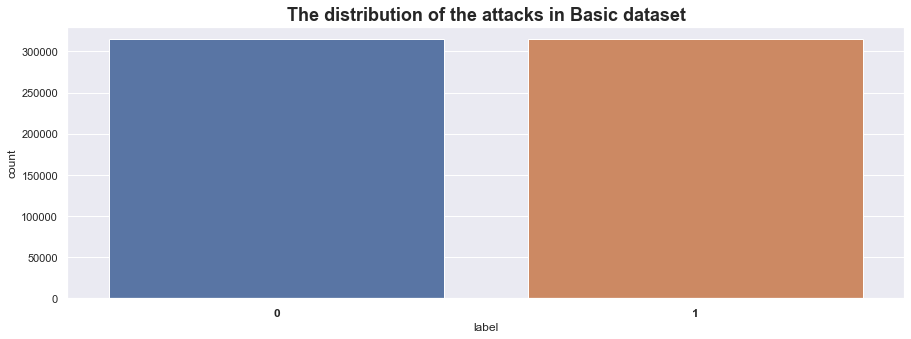

In [16]:
# Plotting target label distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic['label'])
plt.title('The distribution of the attacks in Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

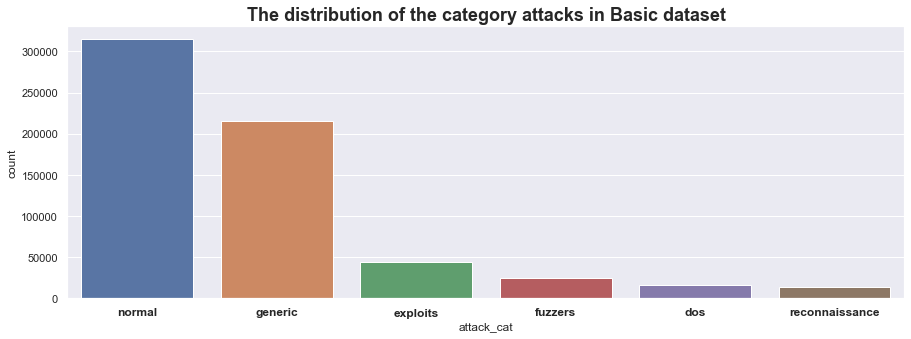

In [17]:
# Plotting attack category distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic['attack_cat'], order = basic['attack_cat'].value_counts().index)
plt.title('The distribution of the category attacks in Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

In [18]:
# Shuffle dataframe
basic=basic.sample(frac=1)

In [19]:
# Generate UNSW-NB15-Train-Basic
n=basic.shape[0]
basic_train = basic.iloc[:round(0.75*n),:] # 75% of dataset
basic_test = basic.iloc[round(0.75*n):,:] # 25% of dataset

## UNSW-NB15-Train-Basic


In [20]:
all_0, all_1 = basic_train['label'].value_counts()[0]*100 / len(basic_train.index), basic_train['label'].value_counts()[1]*100 / len(basic_train.index)

print("In Train-Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In Train-Basic dataset: there are 50.05467399043841 % of normal traffic and 49.94532600956159 % of attacks


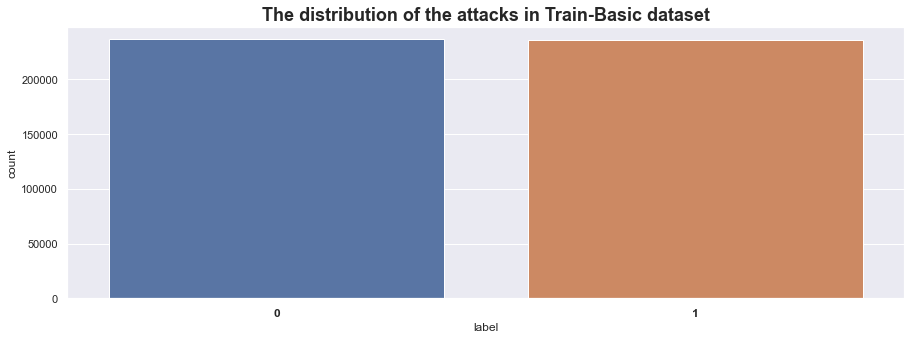

In [21]:
# Plotting target label distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic_train['label'])
plt.title('The distribution of the attacks in Train-Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

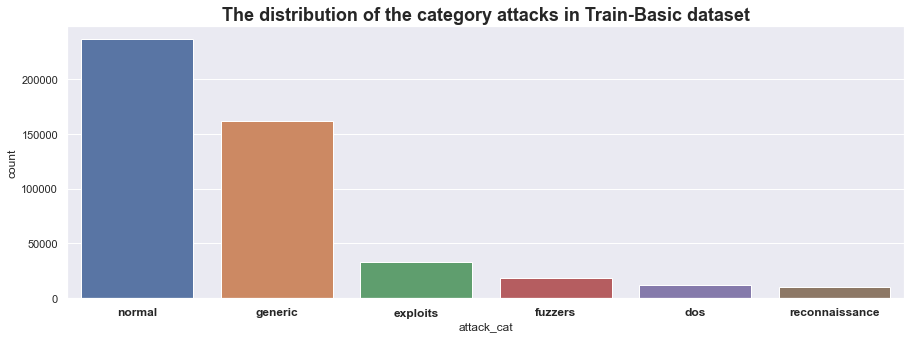

In [22]:
# Plotting attack category distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic_train['attack_cat'], order = basic_train['attack_cat'].value_counts().index)
plt.title('The distribution of the category attacks in Train-Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

In [23]:
basic_train['attack_cat'].value_counts()

normal            236202
generic           161343
exploits           33478
fuzzers            18173
dos                12252
reconnaissance     10440
Name: attack_cat, dtype: int64

## UNSW-NB15-Test-Basic

In [24]:
all_0, all_1 = basic_test['label'].value_counts()[0]*100 / len(basic_test.index), basic_test['label'].value_counts()[1]*100 / len(basic_test.index)

print("In Test-Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In Test-Basic dataset: there are 49.83597802868477 % of normal traffic and 50.16402197131523 % of attacks


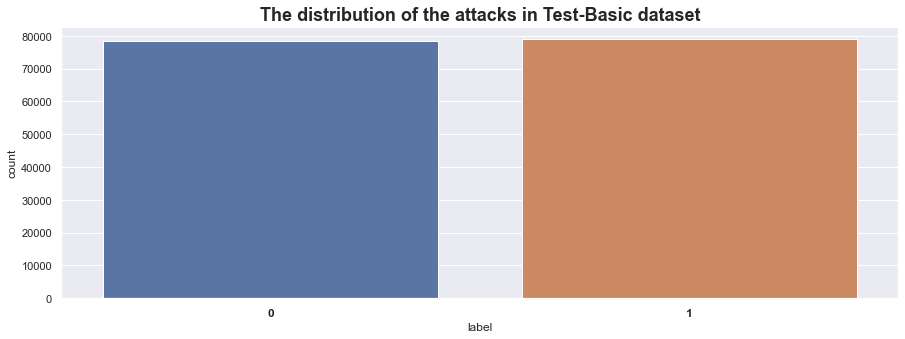

In [25]:
# Plotting target label distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic_test['label'])
plt.title('The distribution of the attacks in Test-Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

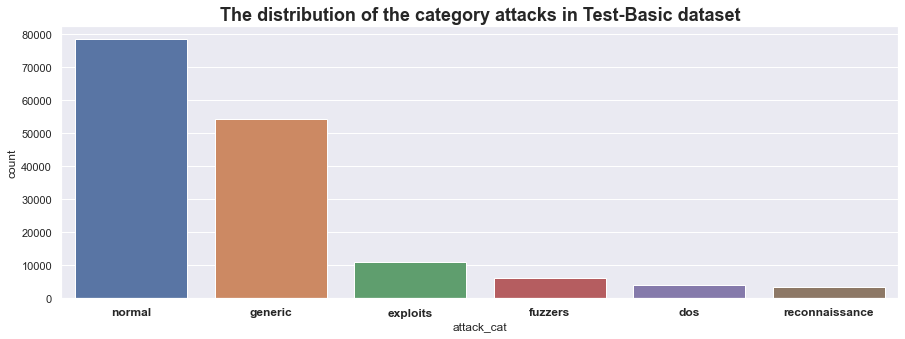

In [26]:
# Plotting attack category distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(basic_test['attack_cat'], order = basic_test['attack_cat'].value_counts().index)
plt.title('The distribution of the category attacks in Test-Basic dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

In [27]:
basic_test['attack_cat'].value_counts()

normal            78390
generic           54138
exploits          11047
fuzzers            6073
dos                4101
reconnaissance     3547
Name: attack_cat, dtype: int64

# UNSW-NB15-Test+

In [28]:
# Creating the Test+ dataset
test_plus = pd.concat([normal, analysis, backdoor, fuzzers, shellcode, worms])

In [29]:
# Balancing the dataset to obtain 50/50% attacks/normal traffic
test_plus=balance_dataset(test_plus)

In [30]:
all_0, all_1 = test_plus['label'].value_counts()[0]*100 / len(test_plus.index), test_plus['label'].value_counts()[1]*100 / len(test_plus.index)

print("In Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In Basic dataset: there are 50.0 % of normal traffic and 50.0 % of attacks


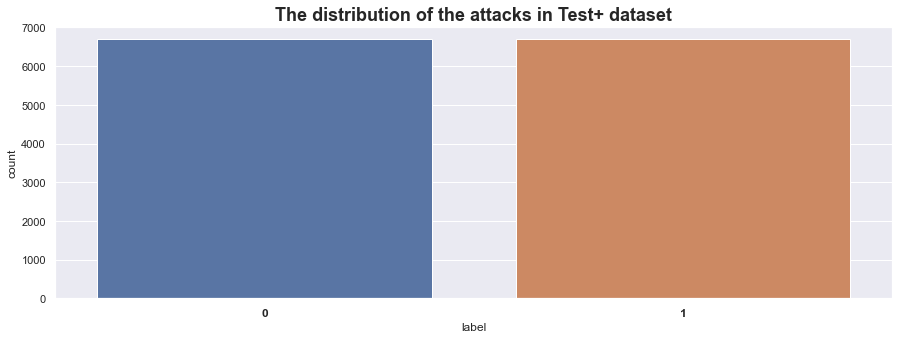

In [31]:
# Plotting target label distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test_plus['label'])
plt.title('The distribution of the attacks in Test+ dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

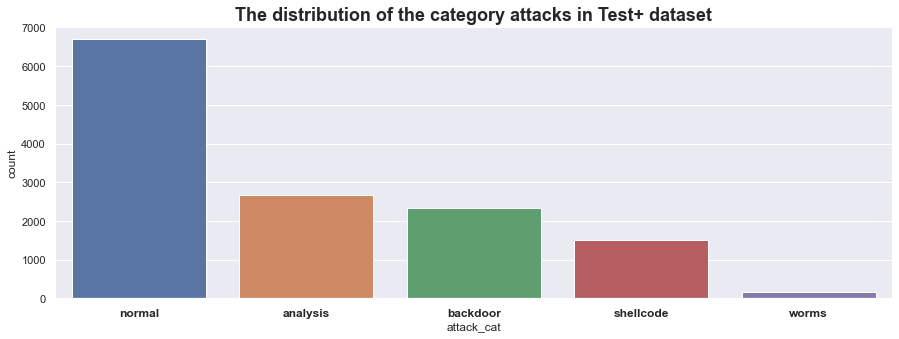

In [32]:
# Plotting attack category distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test_plus['attack_cat'], order = test_plus['attack_cat'].value_counts().index)
plt.title('The distribution of the category attacks in Test+ dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

In [33]:
test_plus['attack_cat'].value_counts()

normal       6691
analysis     2677
backdoor     2329
shellcode    1511
worms         174
Name: attack_cat, dtype: int64

# UNSW-NB15-Test

In [6]:
# Creating the UNSW-NB15-Test dataset
test=balance_dataset(data)

In [7]:
all_0, all_1 = test['label'].value_counts()[0]*100 / len(test.index), test['label'].value_counts()[1]*100 / len(test.index)

print("In Basic dataset: there are {} % of normal traffic and {} % of attacks".format(all_0, all_1))

In Basic dataset: there are 50.0 % of normal traffic and 50.0 % of attacks


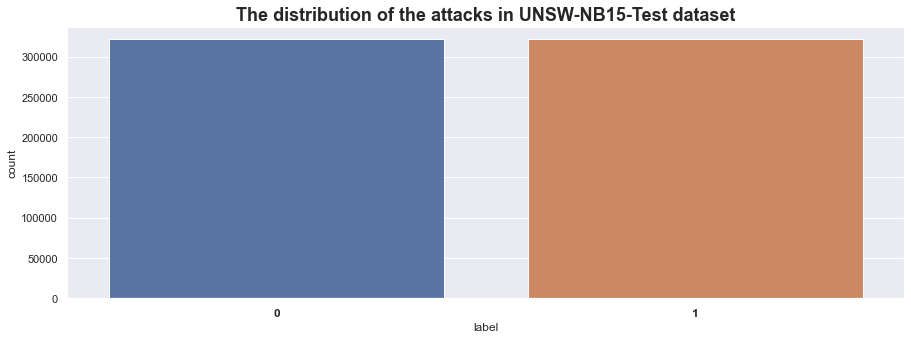

In [9]:
# Plotting target label distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['label'])
plt.title('The distribution of the attacks in UNSW-NB15-Test dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

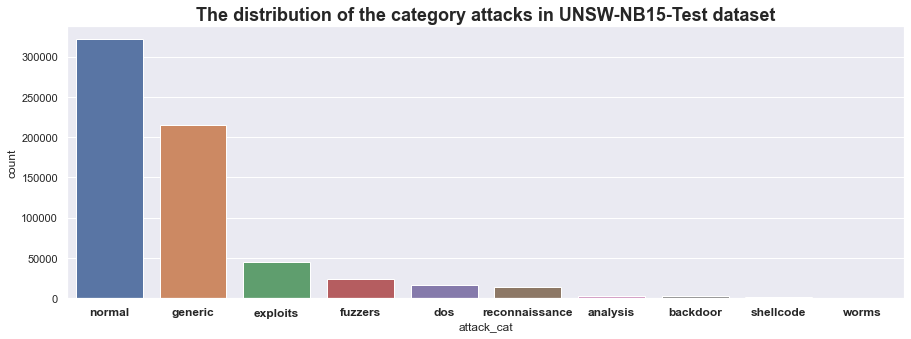

In [10]:
# Plotting attack category distribution
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['attack_cat'], order = test['attack_cat'].value_counts().index)
plt.title('The distribution of the category attacks in UNSW-NB15-Test dataset', weight='bold', fontsize='18')
plt.xticks(weight='bold', fontsize=12)
plt.show()

In [ ]:
test['attack_cat'].value_counts()

normal            321283
generic           215481
exploits           44525
fuzzers            24246
dos                16353
reconnaissance     13987
analysis            2677
backdoor            2329
shellcode           1511
worms                174
Name: attack_cat, dtype: int64

In [ ]:
# Exporting the generated datasets
basic.to_csv('../datasets/UNSW-NB15-Basic.csv', index=False)
basic_train.to_csv('../datasets/UNSW-NB15-Train-Basic.csv', index=False)
basic_test.to_csv('../datasets/UNSW-NB15-Test-Basic.csv', index=False)
test_plus.to_csv('../datasets/UNSW-NB15-Test+.csv', index=False)
test.to_csv('../datasets/UNSW-NB15-Test.csv', index=False)